# Librerías y Pandas


In [2]:
# Importando la librería
import pandas as pd

### Las estructuras de datos en Pandas

**Panda Series**

In [3]:
Serie_numeros = [20, 23, 26, 29, 32, 35, 38]
df_serie = pd.Series(Serie_numeros)
print(df_serie)

0    20
1    23
2    26
3    29
4    32
5    35
6    38
dtype: int64


**Panda Series**

Tanto el arreglo de índices como el de valores pueden modificarse

In [4]:
indices = [1, 2, 3, 4, 5, 6, 7]
df_serie_2 = pd.Series(Serie_numeros, index=indices)
df_serie_2

1    20
2    23
3    26
4    29
5    32
6    35
7    38
dtype: int64

**Panda Data Frame**

Construyendo un Data Frame manualmente

In [5]:
data = {"calorias": [420, 380, 390], "duracion": [30, 40, 50]}
indice = ["primer cliente", "segundo cliente", "tercer cliente"]

df = pd.DataFrame(data, index=indice)

print(df)

                 calorias  duracion
primer cliente        420        30
segundo cliente       380        40
tercer cliente        390        50


###  Elementos de los DataFrame

También podemos seleccionar partes específicas del Data Frame, como índices, columnas y valores

In [6]:
df.index

Index(['primer cliente', 'segundo cliente', 'tercer cliente'], dtype='object')

In [7]:
df.columns

Index(['calorias', 'duracion'], dtype='object')

In [8]:
df.values

array([[420,  30],
       [380,  40],
       [390,  50]])

In [9]:
# Seleccionando columna
df["calorias"]

primer cliente     420
segundo cliente    380
tercer cliente     390
Name: calorias, dtype: int64

In [10]:
# Al seleccionar una columna, automáticamente lo entiende como pandas Series
type(df["calorias"])

pandas.core.series.Series

In [11]:
# Selección de fila
df["calorias"]

primer cliente     420
segundo cliente    380
tercer cliente     390
Name: calorias, dtype: int64

In [12]:
print(df)

                 calorias  duracion
primer cliente        420        30
segundo cliente       380        40
tercer cliente        390        50


### Selección con condición

Supongamos que necesitamos un listado de precios de aquellos autos con peso mayor a 3600

In [13]:
# Eñ truco es: df [condición, nombre_de_la_columna]
df.loc[df.duracion <= 40, "duracion"]

primer cliente     30
segundo cliente    40
Name: duracion, dtype: int64

In [14]:
df.loc[(df.duracion <= 40) & (df.calorias >= 380), :]

,calorias,duracion
primer cliente,420,30
segundo cliente,380,40


### Metodos y Atributos

Carga de datos

In [15]:
# https://www.kaggle.com/datasets/rounakbanik/pokemon
df1 = pd.read_csv("ds_salaries.csv", index_col=1)

In [16]:
df1.head()

,Unnamed: 0,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,,
2020,0,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2020,1,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2020,2,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
2020,3,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
2020,4,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Atributos de pandas

In [17]:
df1.shape

(607, 11)

In [18]:
df1.columns

Index(['Unnamed: 0', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Metodos de pandas

In [19]:
df1["company_location"].value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
PT      4
PL      4
AT      4
MX      3
DK      3
AE      3
PK      3
LU      3
TR      3
BR      3
AU      3
RU      2
CN      2
CH      2
BE      2
NG      2
SI      2
IT      2
CZ      2
NZ      1
HU      1
HN      1
SG      1
HR      1
MT      1
IL      1
UA      1
RO      1
IQ      1
MD      1
CL      1
IR      1
VN      1
KE      1
CO      1
AS      1
DZ      1
EE      1
MY      1
IE      1
Name: count, dtype: int64

In [20]:
df1.describe()

,Unnamed: 0,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,3.240001e+05,112297.869852,70.92257
std,175.370085,1.544357e+06,70957.259411,40.70913
min,0.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,7.000000e+04,62726.000000,50.00000
50%,303.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,1.650000e+05,150000.000000,100.00000
max,606.000000,3.040000e+07,600000.000000,100.00000


In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [22]:
df1.isnull().sum()

Unnamed: 0            0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [23]:
df1.drop_duplicates()

,Unnamed: 0,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,,
2020,0,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2020,1,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2020,2,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
2020,3,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
2020,4,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
2022,602,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
2022,603,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
2022,604,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


Visualizaciones en pandas

<Axes: xlabel='job_title'>

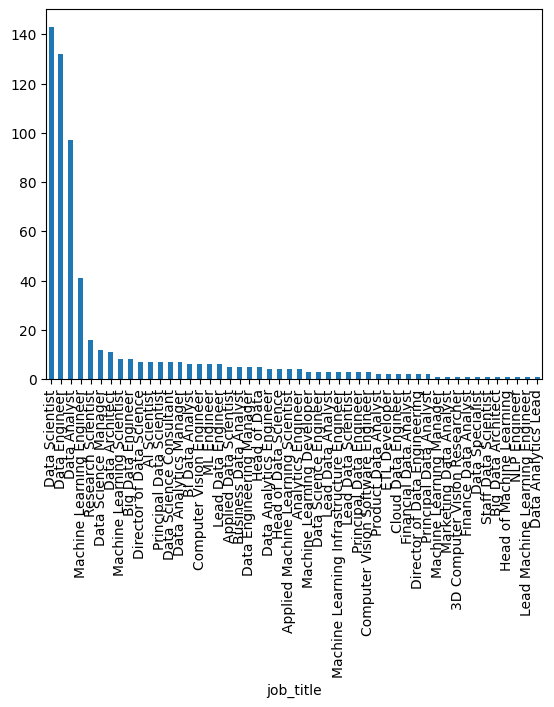

In [24]:
df1["job_title"].value_counts().T.plot.bar()

<Axes: xlabel='company_location'>

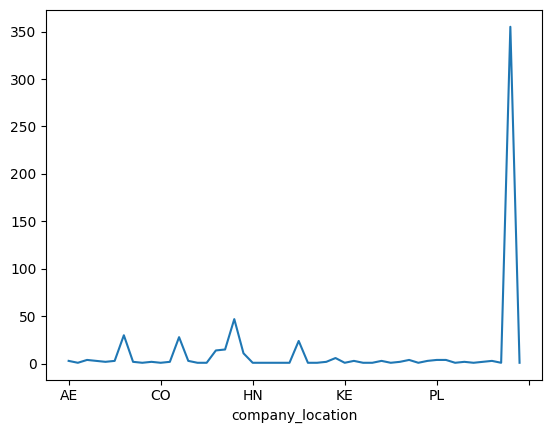

In [25]:
df1["company_location"].value_counts().sort_index().plot.line()

<Axes: ylabel='Frequency'>

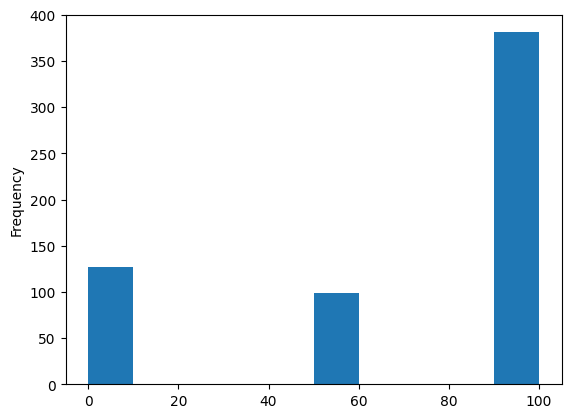

In [26]:
df1["remote_ratio"].plot.hist()